In [160]:
import pandas as pd 
import numpy as np 
from sklearn import linear_model
import matplotlib.pyplot as plt 
import itertools

In [226]:
df = pd.read_csv('projeto.csv', delimiter =';')

for var in ['X1','X2','X3','X4','X5','X7','Y1']:
    #print(var)
    df[var] = df[var].str.replace(',', '.').astype(float)


## Plotando variáveis contra a variável de interesse

In [252]:
def dfgrouper_plot(df,x,y='Y1'):
    
    """
    Essa função plota a média de cada Y para cada valor de X,
    pois o comportamento dos dados nesse dataset é quase como categórico em relação ao eixo X.
    Isso facilita a visualização do scatter, que não estava muito claro sem essa média.
    
    """
    dftemp = df.groupby(x).mean()
    dftemp.reset_index(inplace=True)
    fig = plt.figure(figsize=(10,6))
    plt.scatter(dftemp[x], dftemp[y])
    plt.ylabel('Média de Y1')
    plt.xlabel('Valor de '+x)
    plt.show()
    
    

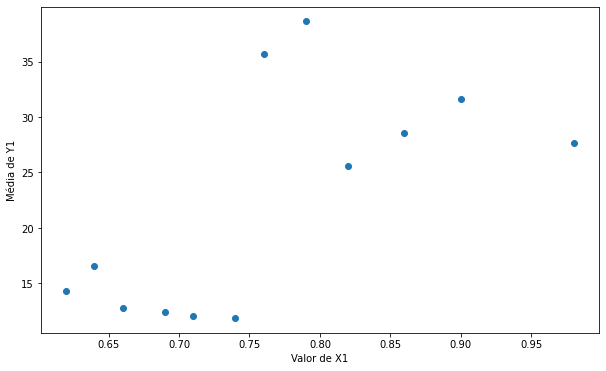

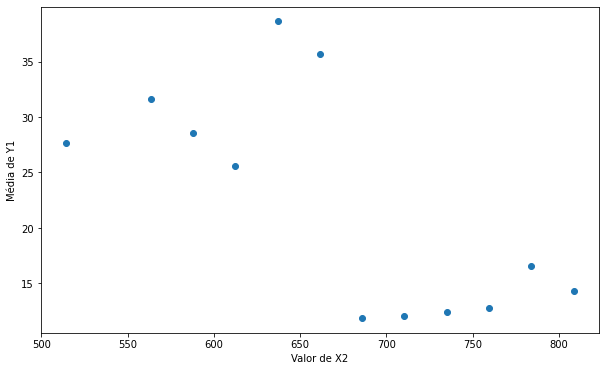

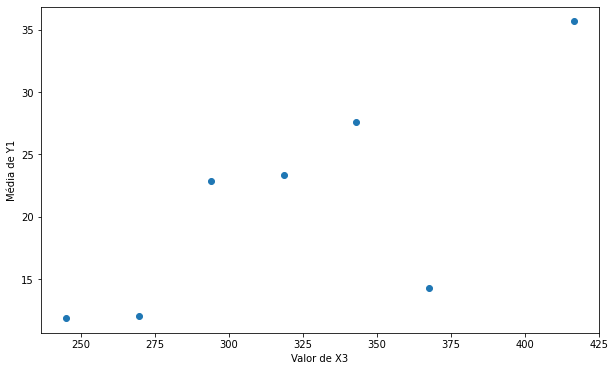

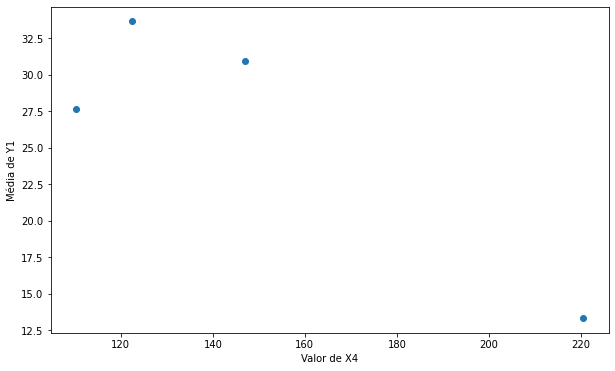

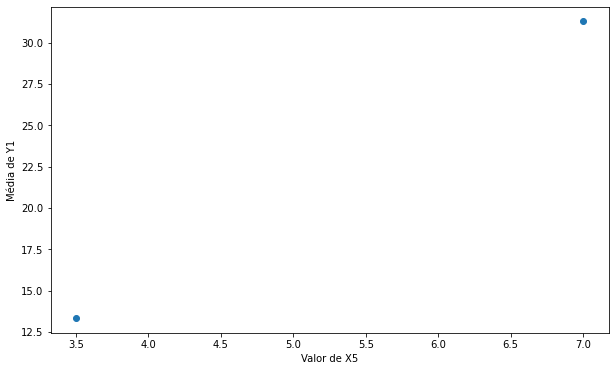

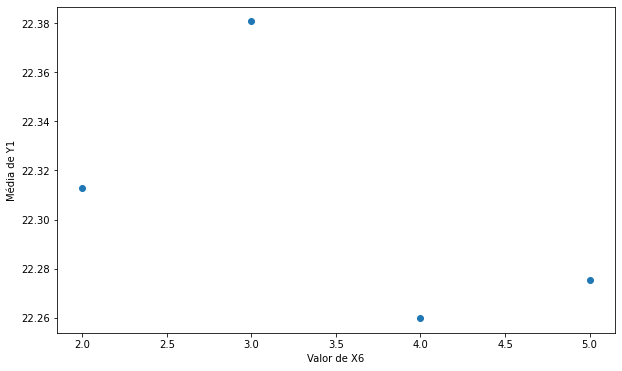

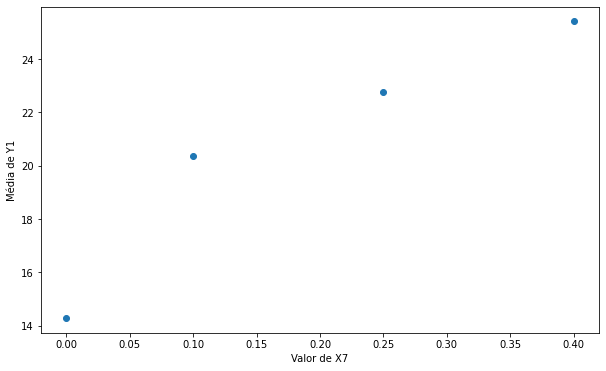

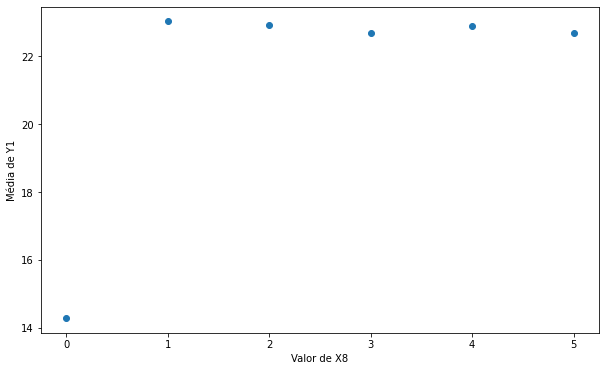

In [253]:
variables = ['X1','X2','X3','X4','X5','X6','X7','X8']

for variable in variables:
    dfgrouper_plot(df=df,
                   x=variable)

##### Comentários sobre as variáveis: 

- A variável X8 parece não predizer bem o comportamento da variável de interesse.
- A variável X6 também não apresenta um padrão consistente

## Criando e avaliando modelos

In [298]:
def model_evaluator(df,variable_list):
    """
    Essa função cria um modelo de regressão linear com base em diversas combinações de variáveis.
    
    Retorna: df com valores preditos e um dataframe de erros de cada modelo. 
    """
    y = df[['Y1']]
    error_list=[]
    for variable_set in variable_list:
        lm = linear_model.LinearRegression()
        x = df[variable_set]
        
        model = lm.fit(x,y)
        predictions = lm.predict(x)
        modelname = ''.join(variable_set).replace('X','')

        
        df[modelname] = predictions
        df[modelname+'error']=abs(df[modelname] - df['Y1'])
        
        coefs = []
        for element in lm.coef_.tolist():
            
            coefs = [round(coef, 1) for coef in element]

        #print(df[modelname+'error'].mean())
        error_list.extend([[modelname,df[modelname+'error'].mean(),coefs]])
        
    df2=pd.DataFrame(error_list,columns=['modelname','mean_error','coeflist'])
        
    return df,df2
    

## Criando todas as combinações possíves de variáveis

- Como nosso problema é pequeno o suficiente, uma varredura de todas as combinaçoes possíveis de variáveis será usada para definir o melhor preditor.

In [256]:
varlist = []
variables = ['X1','X2','X3','X4','X5','X6','X7','X8']
for length in range(1,9):
    comb = list(list(a) for a in itertools.combinations(variables, length))
    varlist.extend(comb)

In [245]:
varlist[:-3]

[['X1'],
 ['X2'],
 ['X3'],
 ['X4'],
 ['X5'],
 ['X6'],
 ['X7'],
 ['X8'],
 ['X1', 'X2'],
 ['X1', 'X3'],
 ['X1', 'X4'],
 ['X1', 'X5'],
 ['X1', 'X6'],
 ['X1', 'X7'],
 ['X1', 'X8'],
 ['X2', 'X3'],
 ['X2', 'X4'],
 ['X2', 'X5'],
 ['X2', 'X6'],
 ['X2', 'X7'],
 ['X2', 'X8'],
 ['X3', 'X4'],
 ['X3', 'X5'],
 ['X3', 'X6'],
 ['X3', 'X7'],
 ['X3', 'X8'],
 ['X4', 'X5'],
 ['X4', 'X6'],
 ['X4', 'X7'],
 ['X4', 'X8'],
 ['X5', 'X6'],
 ['X5', 'X7'],
 ['X5', 'X8'],
 ['X6', 'X7'],
 ['X6', 'X8'],
 ['X7', 'X8'],
 ['X1', 'X2', 'X3'],
 ['X1', 'X2', 'X4'],
 ['X1', 'X2', 'X5'],
 ['X1', 'X2', 'X6'],
 ['X1', 'X2', 'X7'],
 ['X1', 'X2', 'X8'],
 ['X1', 'X3', 'X4'],
 ['X1', 'X3', 'X5'],
 ['X1', 'X3', 'X6'],
 ['X1', 'X3', 'X7'],
 ['X1', 'X3', 'X8'],
 ['X1', 'X4', 'X5'],
 ['X1', 'X4', 'X6'],
 ['X1', 'X4', 'X7'],
 ['X1', 'X4', 'X8'],
 ['X1', 'X5', 'X6'],
 ['X1', 'X5', 'X7'],
 ['X1', 'X5', 'X8'],
 ['X1', 'X6', 'X7'],
 ['X1', 'X6', 'X8'],
 ['X1', 'X7', 'X8'],
 ['X2', 'X3', 'X4'],
 ['X2', 'X3', 'X5'],
 ['X2', 'X3', 'X6'],
 ['X

## Avaliando os modelos e ordenando pelo menor erro médio

In [299]:
errordf = model_evaluator(df,varlist)[1]

In [300]:
errordf.sort_values(by='mean_error',ascending=True)#[0]

,modelname,mean_error,coeflist
219,123457,2.049902,"[-63.8, -1345925214722.6, 1345925214722.6, 269..."
167,12357,2.056717,"[-64.8, -0.1, 0.1, 4.2, 20.4]"
173,12457,2.056717,"[-64.8, -0.0, -0.1, 4.2, 20.4]"
183,13457,2.056717,"[-64.8, -0.0, -0.2, 4.2, 20.4]"
233,134567,2.056888,"[-64.8, -0.0, -0.2, 4.2, -0.0, 20.4]"
...,...,...,...
33,67,8.996150,"[-0.0, 20.4]"
6,7,8.996150,[20.4]
34,68,9.082355,"[-0.0, 0.6]"
7,8,9.082446,[0.6]


In [302]:
errordf[errordf['modelname']=='457']#.coeflist.values

,modelname,mean_error,coeflist
83,457,2.91646,"[0.0, 5.5, 20.4]"


In [301]:
errordf[errordf['modelname']=='123457'].coeflist.values

array([list([-63.8, -1345925214722.6, 1345925214722.6, 2691850429445.0, 4.2, 20.4])],
      dtype=object)